First trend I observed in the dataset Max Temp and Latitude both had strong correlation, with the 
Northern Hemisphere having a r-squared value of: 0.43 negative correlation. While the Southern Hemisphere had 
an r-squared score of: 0.66 positive correlation.

The second I observed in the dataset is Humidity and Latitude maintained no correlation with the 
Northern Hemisphere returning a r-squared value: 0.00 while the Southern Hemisphere returning 
a r-squared value: 0.01. When reviewing Humidity neither Latitude nor Longitude had a correlation.
    
Based on the refined dataset filtering down to ideal weather, Australia is the ideal location for the
vacation with three cities of Geraldton, Yulara and Broken Hill all returning the ideal weather conditions
and a hotel within 5000 meters.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#creates dataframe for cities weather data and saves cvs
cities_df = pd.DataFrame(cities)


cities_df['Lat'] = ''
cities_df['Lng'] = ''
cities_df['Max Temp'] = ''
cities_df['Humidity'] = ''
cities_df['Cloudiness'] = ''
cities_df['Wind Speed'] = ''
cities_df['Country'] = ''
cities_df['Date'] = ''
cities_df.rename(columns={ cities_df.columns[0]: "City" }, inplace = True)
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zhezkazgan,,,,,,,,
1,lebu,,,,,,,,
2,taolanaro,,,,,,,,
3,upernavik,,,,,,,,
4,bossier city,,,,,,,,
...,...,...,...,...,...,...,...,...,...
634,dwarka,,,,,,,,
635,cavarzere,,,,,,,,
636,darnah,,,,,,,,
637,gaimersheim,,,,,,,,


In [4]:
#set static parameter for api key
params={
    "appid": weather_api_key
}

base_url = "http://api.openweathermap.org/data/2.5/weather?"
#loop to loop through the city parameter and add Lat,Lng,MaxTemp,Humidity, cloudiness,windspeed,country and date
for index, row in cities_df.iterrows():
    city = row.City
        
    params["q"] = city
    
    cities_lat_lng = requests.get(base_url,params).json()
    print(f"Processing record {index} | {city}")
    try:
        cities_df.loc[index,'Lat'] = cities_lat_lng['coord']['lat']
        cities_df.loc[index,'Lng'] = cities_lat_lng['coord']['lon']
        cities_df.loc[index,'Max Temp'] = cities_lat_lng['main']['temp_max']
        cities_df.loc[index,'Humidity'] = cities_lat_lng['main']['humidity']
        cities_df.loc[index,'Cloudiness'] = cities_lat_lng['clouds']['all']
        cities_df.loc[index,'Wind Speed'] = cities_lat_lng['wind']['speed']
        cities_df.loc[index,'Country'] = cities_lat_lng['sys']['country']
        cities_df.loc[index,'Date'] = cities_lat_lng['dt']
    #also for cities not found in the open weather to be skipped and show progress
    except (KeyError, SyntaxError):
           print("City not found. Skipping...")

Processing record 0 | zhezkazgan
Processing record 1 | lebu
Processing record 2 | taolanaro
City not found. Skipping...
Processing record 3 | upernavik
Processing record 4 | bossier city
Processing record 5 | karkaralinsk
City not found. Skipping...
Processing record 6 | inhambane
Processing record 7 | olinda
Processing record 8 | ushuaia
Processing record 9 | geraldton
Processing record 10 | butaritari
Processing record 11 | westerland
Processing record 12 | rikitea
Processing record 13 | gamba
Processing record 14 | grand river south east
City not found. Skipping...
Processing record 15 | hithadhoo
Processing record 16 | cherskiy
Processing record 17 | mys shmidta
City not found. Skipping...
Processing record 18 | vostok
Processing record 19 | nanortalik
Processing record 20 | maues
Processing record 21 | vanimo
Processing record 22 | cape town
Processing record 23 | mataura
Processing record 24 | sentyabrskiy
City not found. Skipping...
Processing record 25 | port alfred
Processing 

Processing record 233 | madimba
Processing record 234 | de-kastri
Processing record 235 | poum
Processing record 236 | mecca
Processing record 237 | qiongshan
Processing record 238 | ciudad bolivar
Processing record 239 | puro
Processing record 240 | russell
Processing record 241 | isangel
Processing record 242 | los llanos de aridane
Processing record 243 | mwinilunga
Processing record 244 | bengkulu
Processing record 245 | yulara
Processing record 246 | ahipara
Processing record 247 | vila velha
Processing record 248 | korla
Processing record 249 | sao felix do xingu
Processing record 250 | mali idos
City not found. Skipping...
Processing record 251 | ushtobe
Processing record 252 | marzuq
Processing record 253 | carnarvon
Processing record 254 | rocha
Processing record 255 | varena
Processing record 256 | ca mau
Processing record 257 | pevek
Processing record 258 | carndonagh
Processing record 259 | deputatskiy
Processing record 260 | magaria
Processing record 261 | victoria
Process

Processing record 469 | kemijarvi
Processing record 470 | gurgan
City not found. Skipping...
Processing record 471 | preobrazheniye
Processing record 472 | monrovia
Processing record 473 | novoselitskoye
Processing record 474 | urumqi
Processing record 475 | muisne
Processing record 476 | smolensk
Processing record 477 | beruwala
Processing record 478 | lompoc
Processing record 479 | toucheng
Processing record 480 | erenhot
Processing record 481 | hegang
Processing record 482 | aguililla
Processing record 483 | acapulco
Processing record 484 | minas novas
Processing record 485 | nome
Processing record 486 | chengde
Processing record 487 | manta
Processing record 488 | rota
Processing record 489 | kavaratti
Processing record 490 | joshimath
Processing record 491 | quarteira
Processing record 492 | ornskoldsvik
Processing record 493 | guarapari
Processing record 494 | ahuimanu
Processing record 495 | sawakin
Processing record 496 | touros
Processing record 497 | hirara
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#saves output file for Weather Cities Output
cities_df.to_csv("../output_data/weather_cities_output.csv")

In [11]:
#displaying dataframe to ensure proper data was catpured
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zhezkazgan,47.8043,67.7144,302.28,24,10,4.91,KZ,1627929507
1,lebu,-37.6167,-73.65,286.32,72,46,9.06,CL,1627929457
2,taolanaro,,,,,,,,
3,upernavik,72.7868,-56.1549,280.94,69,10,0.58,GL,1627929479
4,bossier city,32.516,-93.7321,301.47,80,75,0,US,1627929288


In [13]:
#checking max humidity for next step
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"], downcast="float")
humidity_max = cities_df['Humidity'].max()
humidity_max  

100.0

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#section skipped per instruction

In [14]:
#formating columns from object to float for plotting
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"], downcast="float")
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"], downcast="float")
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"], downcast="float")
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"], downcast="float")
cities_df.dtypes

City           object
Lat           float32
Lng            object
Max Temp      float32
Humidity      float32
Cloudiness    float32
Wind Speed    float32
Country        object
Date           object
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

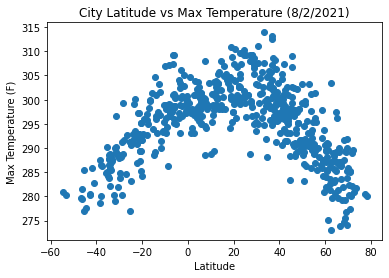

<Figure size 432x288 with 0 Axes>

In [17]:
# Plot Latitude versus Temperature on a scatterplot
latitude = cities_df.Lat
temperature = cities_df['Max Temp']
plt.scatter(latitude,temperature)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (8/2/2021)")
plt.show()
plt.savefig('../output_data/lat_v_temp.png')

## Latitude vs. Humidity Plot

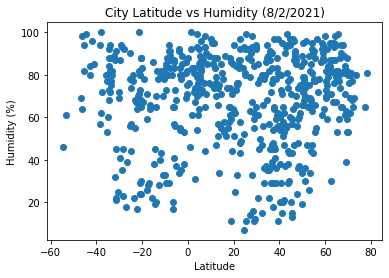

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot Latitude versus Humidity on a scatterplot
latitude = cities_df.Lat
humidity = cities_df['Humidity']
plt.scatter(latitude,humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (8/2/2021)")
plt.show()
plt.savefig('../output_data/lat_v_humd.png')

## Latitude vs. Cloudiness Plot

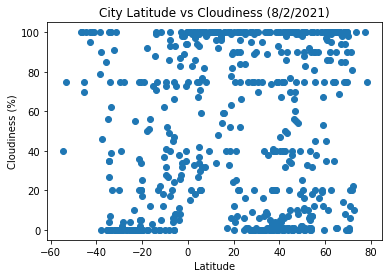

<Figure size 432x288 with 0 Axes>

In [19]:
# Plot Latitude versus Cloudiness on a scatterplot
latitude = cities_df.Lat
cloudiness = cities_df['Cloudiness']
plt.scatter(latitude,cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (8/2/2021)")
plt.show()
plt.savefig('../output_data/lat_v_cloud.png')

## Latitude vs. Wind Speed Plot

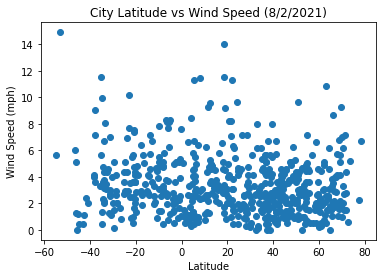

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot Latitude versus Wind Speed on a scatterplot
latitude = cities_df.Lat
wind_speed = cities_df['Wind Speed']
plt.scatter(latitude,wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (8/2/2021)")
plt.show()
plt.savefig('../output_data/lat_v_windspeed.png')

## Linear Regression

In [22]:
#sorting main dataframe into northern and southern dataframes
northern_latitude_df = cities_df.loc[(cities_df['Lat'] > 0)]
southern_latitude_df = cities_df.loc[(cities_df['Lat'] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4305416167605882


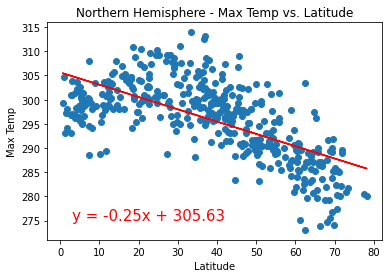

<Figure size 432x288 with 0 Axes>

In [23]:
# Northern Hemisphere - Max Temp vs Latitude Linear Regression

x_values = northern_latitude_df['Lat']
y_values = northern_latitude_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,275),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.show()
plt.savefig('../output_data/NH_Temp_Lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6696493595056526


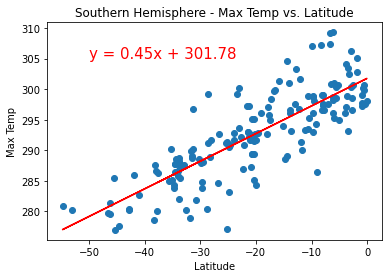

<Figure size 432x288 with 0 Axes>

In [24]:
# Southern Hemisphere - Max Temp vs Latitude Linear Regression

x_values = southern_latitude_df['Lat']
y_values = southern_latitude_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,305),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.show()
plt.savefig('../output_data/SH_Temp_Lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00016259471518334788


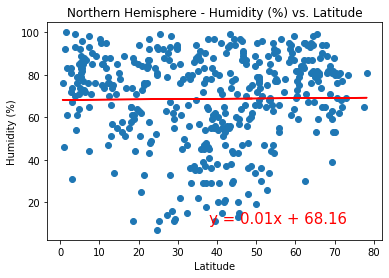

<Figure size 432x288 with 0 Axes>

In [25]:
# Northern Hemisphere - Humidity (%) vs Latitude Linear Regression

x_values = northern_latitude_df['Lat']
y_values = northern_latitude_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.show()
plt.savefig('../output_data/NH_Humd_Lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007354585176480798


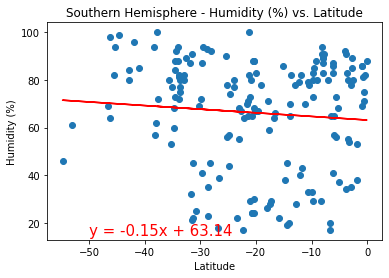

<Figure size 432x288 with 0 Axes>

In [26]:
# Southern Hemisphere - Humidity (%) vs Latitude Linear Regression

x_values = southern_latitude_df['Lat']
y_values = southern_latitude_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.show()
plt.savefig('../output_data/SH_Humd_Lat.png')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008387591626871442


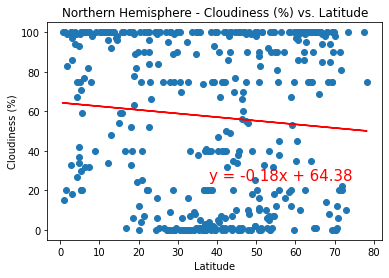

<Figure size 432x288 with 0 Axes>

In [27]:
# Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

x_values = northern_latitude_df['Lat']
y_values = northern_latitude_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.show()
plt.savefig('../output_data/NH_Cloud_Lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 4.729874834188838e-05


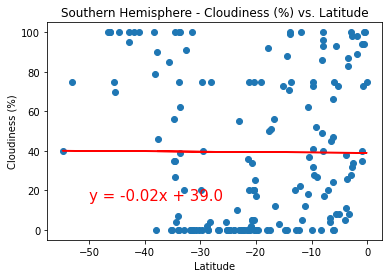

<Figure size 432x288 with 0 Axes>

In [28]:
# Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

x_values = southern_latitude_df['Lat']
y_values = southern_latitude_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.show()
plt.savefig('../output_data/SH_Cloud_Lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005959940283363699


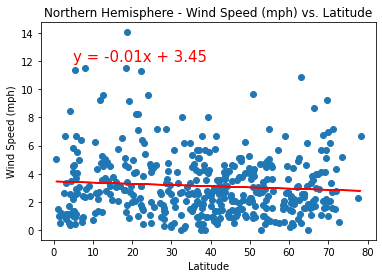

<Figure size 432x288 with 0 Axes>

In [29]:
# Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression

x_values = northern_latitude_df['Lat']
y_values = northern_latitude_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.show()
plt.savefig('../output_data/NH_Windspeed_Lat.png')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004093664035954031


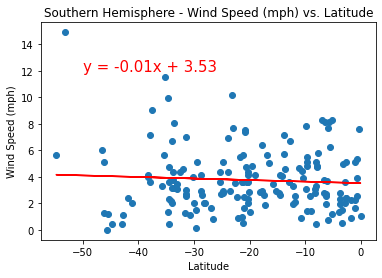

<Figure size 432x288 with 0 Axes>

In [30]:
# Southern Hemisphere - Wind Speed vs Latitude Linear Regression

x_values = southern_latitude_df['Lat']
y_values = southern_latitude_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.show()
plt.savefig('../output_data/SH_windspeed_Lat.png')